<a href="https://colab.research.google.com/github/EngenPedro/Imersao-Python-Alura/blob/main/Imers%C3%A3oAlura_Aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet


In [2]:
dados = yf.download('JNJ', start= '2020-01-01', end= '2023-12-12', progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099121,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592850,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432419,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216782,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198929,6605800
...,...,...,...,...,...,...,...
988,2023-12-05,158.800003,159.630005,158.220001,158.550003,157.355255,7268200
989,2023-12-06,158.520004,158.660004,156.169998,156.619995,155.439789,6642900
990,2023-12-07,156.580002,156.580002,154.710007,155.399994,154.228989,6532400
991,2023-12-08,155.419998,155.850006,153.839996,154.419998,153.256378,6253700


In [4]:
# Vamos dividir os dados em dados de treino e dados de teste, os dados de treinos serão usados para treinar o
# Prophet para que ele possa fazer uma previsão dos preços das ações após o dia 31-07 e os dados de teste é
# para testar a previsão, verificar o quanto a presvisão está errada

dados_treino = dados[dados["Date"]<"2023-07-31"]
dados_teste = dados[dados["Date"]>="2023-07-31"]

# Por padrão temos que renomear as colunas Date e Close em ds e y

dados_prophet_treino = dados_treino[["Date", "Close"]].rename(columns={"Date":"ds", "Close": "y"})
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [5]:
# Agora vamos instanciar o modelo, criar um espécime do modelo de previsão e configurá-lo, com
# as sazonalidades anuais, semanais e diáiras, nesse caso, solicitando que as sazonalidades
# semanais e anuais sejam consideradas, mas não as diárias.

# Solicitamos que o modelo considere os feriados, nesse caso, nos feriados dos Estados Unidos.

# E treinamos o modelo com os dados de treino.

modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name="US")

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdod2at3/rxog4xro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92796', 'data', 'file=/tmp/tmpxdod2at3/v_gzeopp.json', 'init=/tmp/tmpxdod2at3/rxog4xro.json', 'output', 'file=/tmp/tmpxdod2at3/prophet_model9asyg8b6/prophet_model-20240402205819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:58:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:58:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
#Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

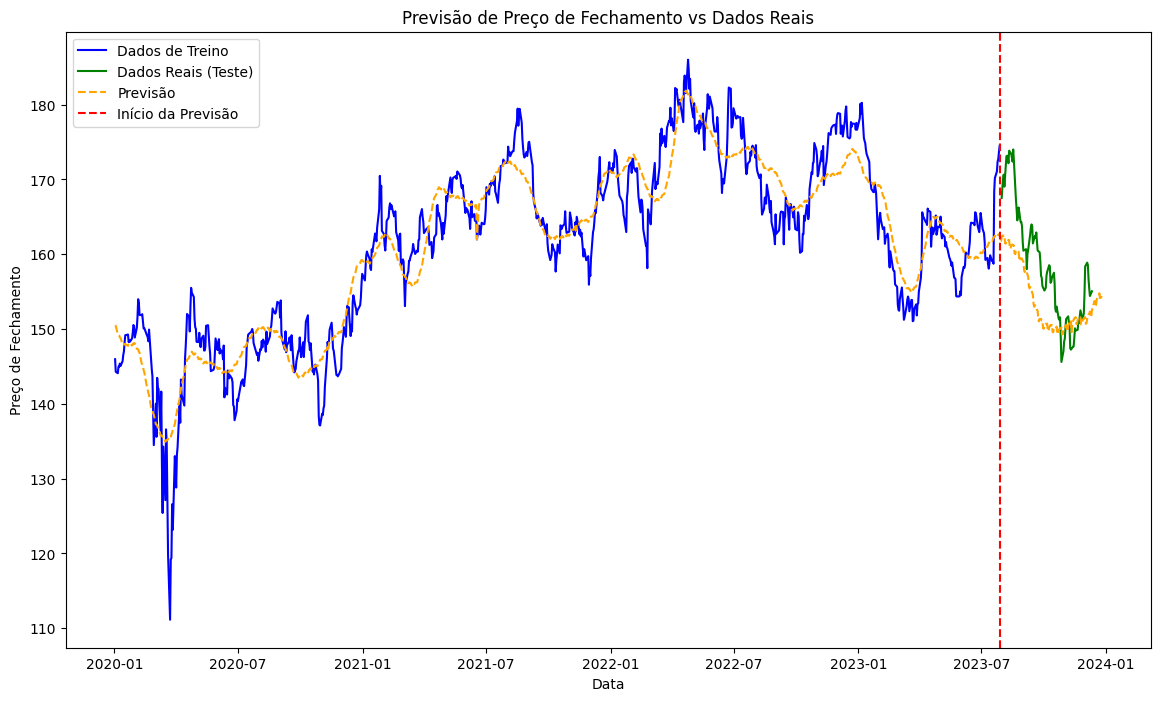

In [7]:
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()